In [1]:
import pandas as pd
wtht = pd.read_csv('weight-height.csv')
from scipy import stats
import numpy as np

Question: What are the chances that I select someone with a height of 6'6" or more from this dataset, assuming that the data are normally distributed?

In [2]:
wtht.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
wtht.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [6]:
wtht.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
wtht['Height_stdzd'] = (wtht['Height'] - wtht['Height'].mean()) / wtht['Height'].std()

In [6]:
wtht['Height_stdzd'][:5]

0    1.943964
1    0.627505
2    2.012343
3    1.393991
4    0.913375
Name: Height_stdzd, dtype: float64

In [15]:
(78 - wtht['Height'].mean()) / wtht['Height'].std()

3.0233541848269025

Now check the z-table! <http://www.z-table.com>

Note that we have simply _assumed_ that these heights are normally distributed, and that they are representative of the U.S. population. Let's eyeball the graph to make sure we've not made a bad assumption.

In [14]:
wtht['Height'].mean()

66.36755975482106

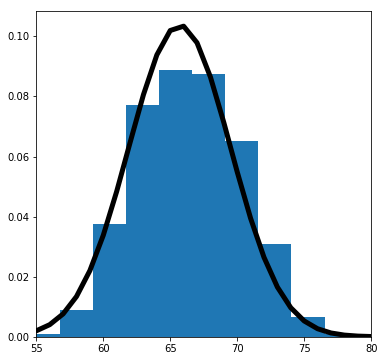

In [35]:
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 100)
mu = wtht['Height'].mean()
sigma = wtht['Height'].std()

plt.figure(figsize=(6,6))
plt.xlim(55, 80)
plt.hist(wtht['Height'], density=True)
plt.plot(stats.norm.pdf(x, mu, sigma), 'k', lw=5)
plt.show();

Naturally, sklearn has a tool for preprocessing data that will scale our columns for us; this will come in handy in the future!

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
wtht_num = wtht[['Height', 'Weight']]
wtht_scaled = pd.DataFrame(ss.fit_transform(wtht_num),
                           columns = ['HtStd', 'WtStd'])

In [21]:
wtht_scaled.head()

,HtStd,WtStd
0,1.944061,2.505797
1,0.627537,0.027101
2,2.012443,1.597806
3,1.394060,1.825222
4,0.913421,1.398750
